In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
salary = pd.read_csv('Employee_Salary.csv')

In [4]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


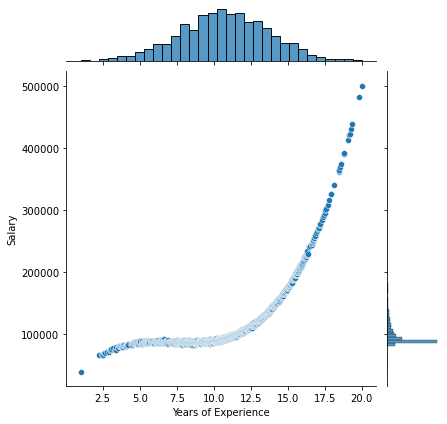

In [6]:
sns.jointplot(x = 'Years of Experience', y = 'Salary', data = salary)

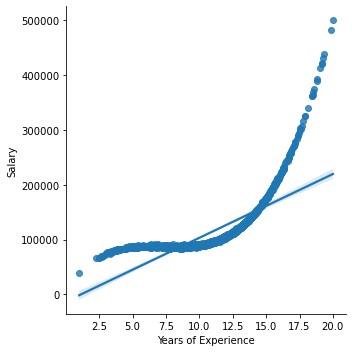

In [7]:
sns.lmplot(x= 'Years of Experience', y = 'Salary', data = salary)

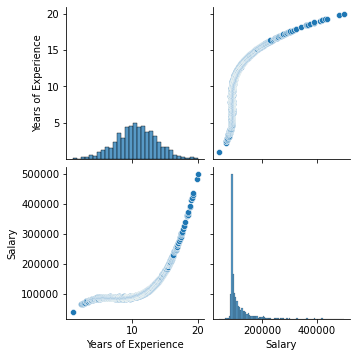

In [8]:
sns.pairplot(salary)

In [9]:
X = salary[['Years of Experience']]

In [10]:
X

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [11]:
y = salary[['Salary']]

In [12]:
y

,Salary
0,40000.00000
1,65979.42119
2,67253.57549
3,67342.43510
4,70532.20448
...,...
1995,421534.69100
1996,430478.02650
1997,438090.84540
1998,482242.16080


## Using all the data as training data rather than spliting it in testing and training 

In [16]:
X_train = X
y_train = y

In [17]:
X_train.shape, y_train.shape

((2000, 1), (2000, 1))

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression(fit_intercept = True)

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print('Linear model coeff (m)',regressor.coef_)
print('Linear model coeff (b)',regressor.intercept_)

Linear model coeff (m) [[11640.22916165]]
Linear model coeff (b) [-13063.09931519]


## Visualise the data 

Text(0.5, 1.0, 'Years of Experience vs. Salary (Linear)')

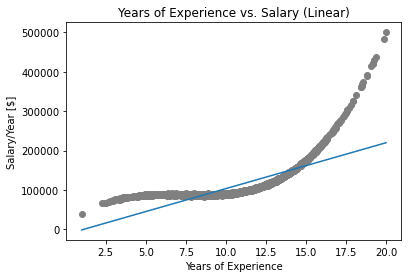

In [22]:
plt.scatter(X_train,y_train, color = 'gray')
plt.plot(X_train,regressor.predict(X_train))
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Years of Experience vs. Salary (Linear)')

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly_regressor = PolynomialFeatures(degree = 5)

In [55]:
X_columns = poly_regressor.fit_transform(X_train)

In [56]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(X_columns,y_train)

LinearRegression()

In [59]:
print('Model Coeff: ',regressor.coef_)

Model Coeff:  [[ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
  -1.03521070e+00  2.09284278e-02]]


In [60]:
print('Model Coeff: ',regressor.coef_)

Model Coeff:  [[ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
  -1.03521070e+00  2.09284278e-02]]


In [61]:
y_predict = regressor.predict( poly_regressor.fit_transform(X_train))

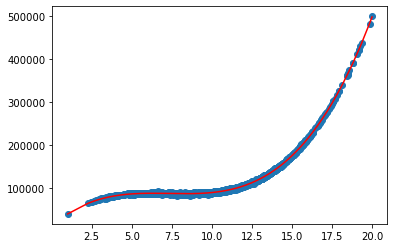

In [62]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_predict,color = 'red')